<a href="https://colab.research.google.com/github/min290/projects_data_science/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pip install xgboost


In [4]:
from xgboost import XGBClassifier

In [5]:
from wordcloud import WordCloud

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [8]:
import pickle
import re

In [13]:
import pandas as pd
import zipfile

# Assuming 'archive (7).zip' is in a folder named 'data' within the same directory
zip_file = '/archive (7).zip'  # Updated path

# Specify the file you want to read
file_name = 'twitter_training.csv'

# Read the CSV directly from the ZIP
with zipfile.ZipFile(zip_file, 'r') as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# Display the first few rows
print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [14]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
df.shape

(74681, 4)

In [16]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [17]:
df.isnull().sum()

,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [18]:
df.duplicated().sum()

np.int64(2700)

In [19]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [20]:
df = df.rename(columns={'2401':'num','Borderlands':'country','Positive':'rating','im getting on borderlands and i will murder you all ,':'reviews'})

In [21]:
df.head()


,num,country,rating,reviews
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [22]:
df['reviews'] = df['reviews'].astype(str)

df['length'] = df['reviews'].apply(len)

df.head()

,num,country,rating,reviews,length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53


In [23]:
df.dtypes

,0
num,int64
country,object
rating,object
reviews,object
length,int64


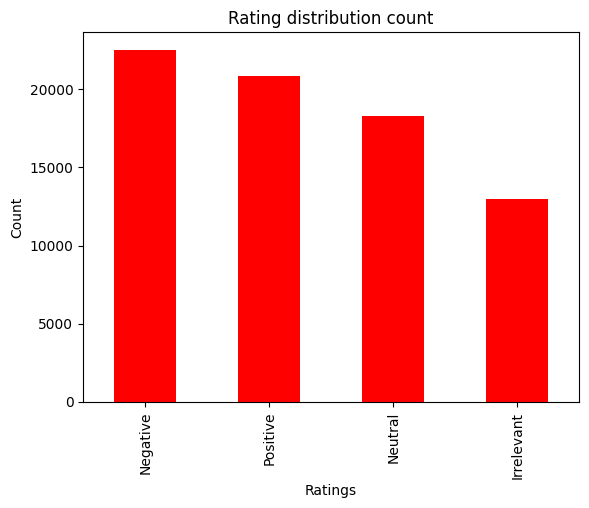

In [25]:
df['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

0

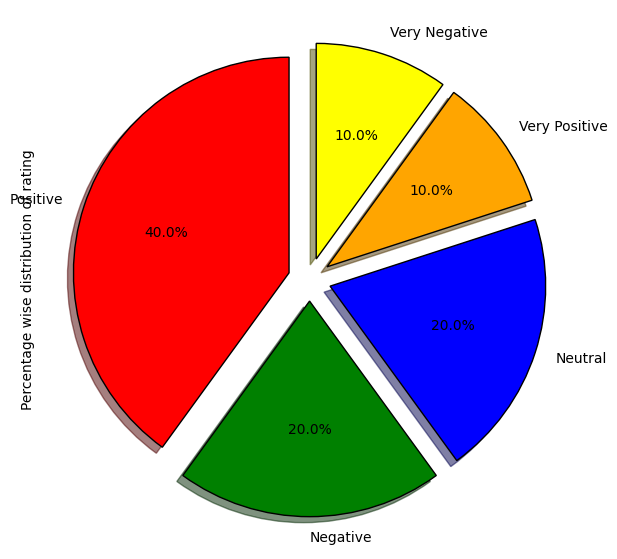

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from io import BytesIO
data = pd.DataFrame({'rating': ['Positive', 'Negative', 'Neutral', 'Very Positive', 'Very Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive']})


fig = plt.figure(figsize=(7, 7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = data['rating'].value_counts() / data.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distribution of rating')

graph = BytesIO()
fig.savefig(graph, format="png")
graph.seek(0)

In [27]:
df['country'].value_counts()

,count
country,
Microsoft,2400
MaddenNFL,2400
TomClancysRainbowSix,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


<ipython-input-28-9f3561cb9fa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['country'].value_counts().values, y = df['country'].value_counts().index, palette = 'viridis')


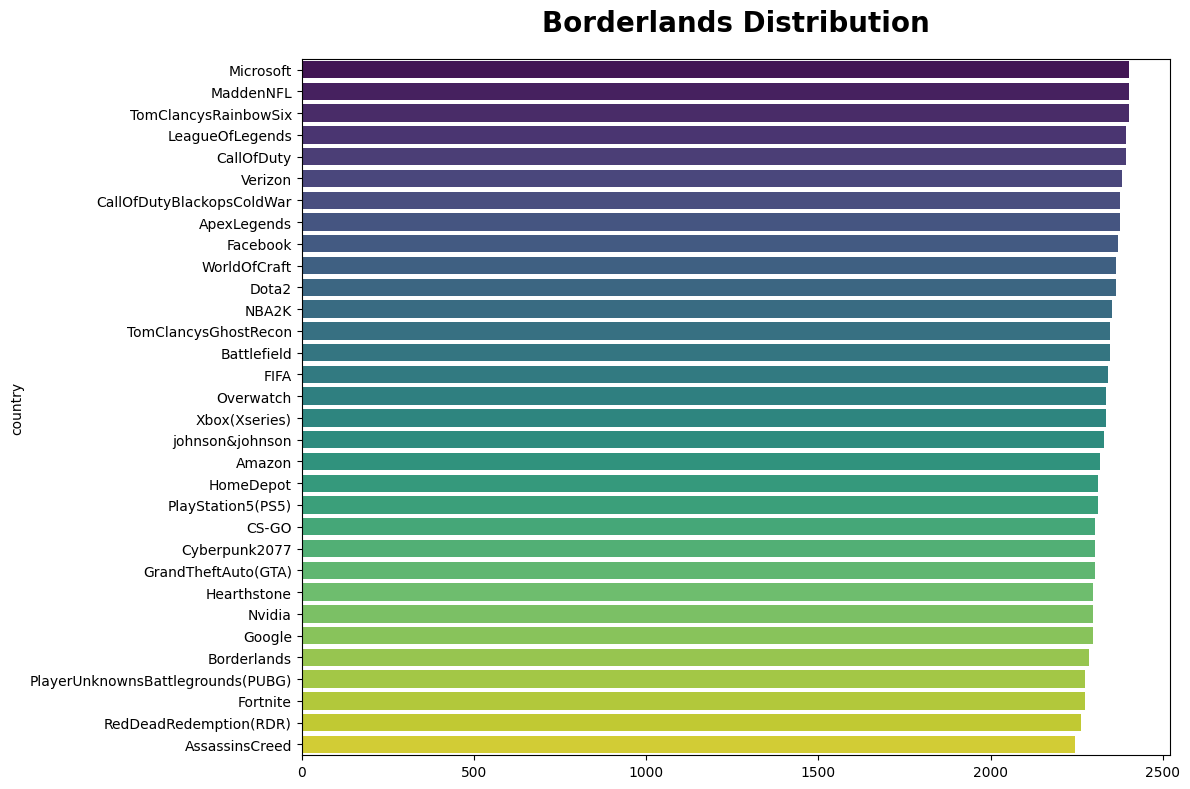

In [28]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['country'].value_counts().values, y = df['country'].value_counts().index, palette = 'viridis')
plt.title("Borderlands Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [30]:
df['label']=encoder.fit_transform(df['rating'])

In [78]:
df.head(10)

,num,country,rating,reviews,length,label,num_word,num_sentence
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3,11,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3,11,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3,13,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3,11,1
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,286,3,62,8
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,293,3,63,4
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,139,3,32,2
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,283,3,61,8
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,288,3,62,8


In [32]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
df['num_word']=df['reviews'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,num,country,rating,reviews,length,label,num_word
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3,13
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3,11
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3,11
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3,13
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3,11


In [35]:
df['num_sentence']=df['reviews'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,num,country,rating,reviews,length,label,num_word,num_sentence
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,3,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,3,11,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,3,11,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,3,13,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,3,11,1


In [37]:
df[df['label']==3][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,20831.000000,20831.000000,20831.000000
mean,95.138640,20.103980,1.886083
std,77.527495,16.792837,1.582560
min,1.000000,0.000000,0.000000
25%,35.000000,8.000000,1.000000
50%,74.000000,15.000000,1.000000
75%,133.000000,28.000000,2.000000
max,692.000000,198.000000,33.000000


In [38]:
df[df['label']==2][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,18318.000000,18318.000000,18318.000000
mean,117.506660,23.761655,2.095152
std,77.955804,17.125534,1.883475
min,1.000000,0.000000,0.000000
25%,60.000000,12.000000,1.000000
50%,104.000000,20.000000,1.000000
75%,160.000000,33.000000,3.000000
max,957.000000,198.000000,31.000000


In [39]:
df[df['label']==1][['length','num_word','num_sentence']].describe()

,length,num_word,num_sentence
count,22542.000000,22542.000000,22542.000000
mean,110.401828,23.100523,1.809422
std,82.095795,17.439542,1.359893
min,1.000000,0.000000,0.000000
25%,45.000000,9.000000,1.000000
50%,90.000000,19.000000,1.000000
75%,160.000000,33.000000,2.000000
max,727.000000,198.000000,22.000000


In [40]:
df[df['label']==0][['length','num_word','num_sentence']].describe()


,length,num_word,num_sentence
count,12990.000000,12990.000000,12990.000000
mean,109.973980,22.901078,2.015319
std,79.378055,17.195425,1.725303
min,1.000000,0.000000,0.000000
25%,49.000000,10.000000,1.000000
50%,92.000000,18.000000,1.000000
75%,154.000000,32.000000,2.000000
max,692.000000,198.000000,25.000000


<Axes: xlabel='length', ylabel='Count'>

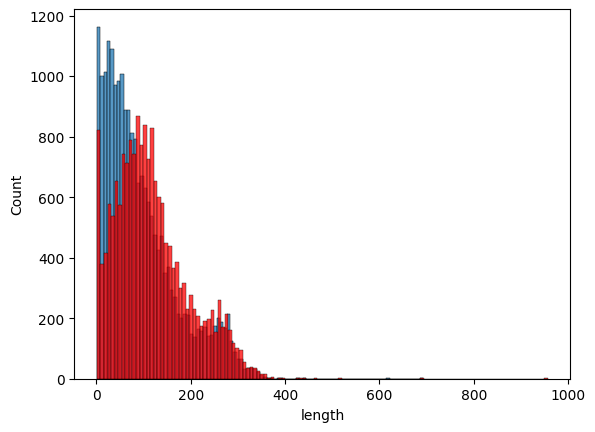

In [41]:
sns.histplot(df[df['label']==3]['length'])
sns.histplot(df[df['label']==2]['length'],color='red')


In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [43]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.reviews)

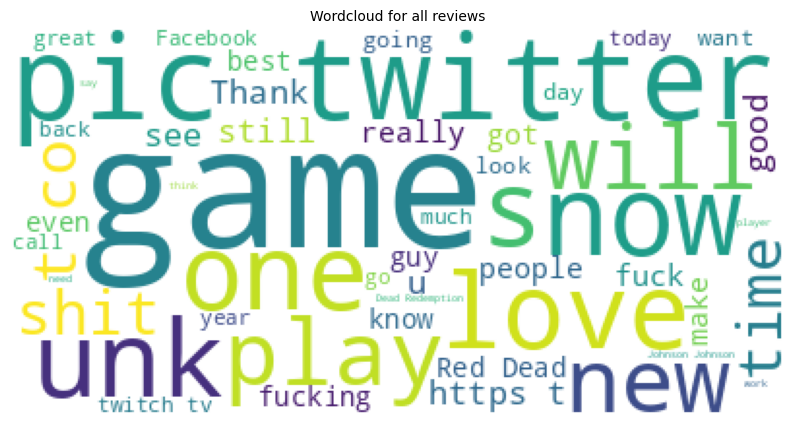

In [44]:
reviews = " ".join([review for review in df['reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

model building

In [45]:
X = df['reviews']
y = df['label']

In [46]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [47]:
tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [76]:
print(X_train, X_test, y_train, y_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 971711 stored elements and shape (59744, 31063)>
  Coords	Values
  (0, 2629)	0.07327900102328884
  (0, 17490)	0.1103096431012338
  (0, 25236)	0.10626618287762679
  (0, 17120)	0.18304753821281158
  (0, 11135)	0.08618674566523965
  (0, 19421)	0.16154758186120372
  (0, 18498)	0.09530917011489938
  (0, 29543)	0.11902642362871853
  (0, 19838)	0.12268130892811549
  (0, 13298)	0.178932599584989
  (0, 3234)	0.11637137657359808
  (0, 7476)	0.21891818836395804
  (0, 16673)	0.1752913776358597
  (0, 17008)	0.20812839988963658
  (0, 20934)	0.28384477620262205
  (0, 17650)	0.2679120583521012
  (0, 3787)	0.3141047364418404
  (0, 2554)	0.3254002260752499
  (0, 25644)	0.5843071078563985
  (1, 17490)	0.1338516975546683
  (1, 11135)	0.10458054155263373
  (1, 11516)	0.18803429193654486
  (1, 19421)	0.1960247305680205
  (1, 27073)	0.11699353094075787
  (1, 13052)	0.13645936066452685
  :	:
  (59742, 11711)	0.16952177626945872
  (59742, 22267)	0.1

In [49]:
X_train.shape

(59744, 31063)

In [50]:
y_train.shape

(59744,)

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
lr.score(X_train, y_train)

0.841088644884842

In [53]:
y_pred=lr.predict(X_test)

In [54]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7717747874405838

<Axes: >

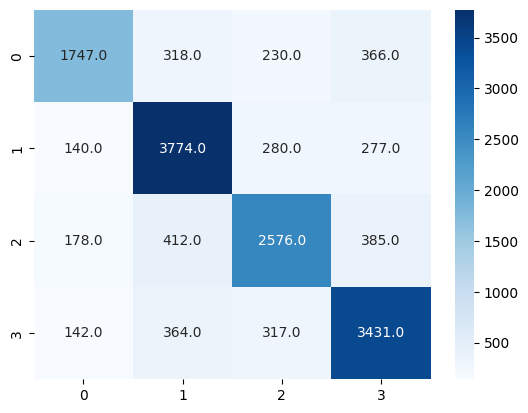

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.66      0.72      2661
           1       0.78      0.84      0.81      4471
           2       0.76      0.73      0.74      3551
           3       0.77      0.81      0.79      4254

    accuracy                           0.77     14937
   macro avg       0.77      0.76      0.76     14937
weighted avg       0.77      0.77      0.77     14937



In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
dt.score(X_train, y_train)

0.9741061863952866

In [60]:
y_pred = dt.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7611970275155654

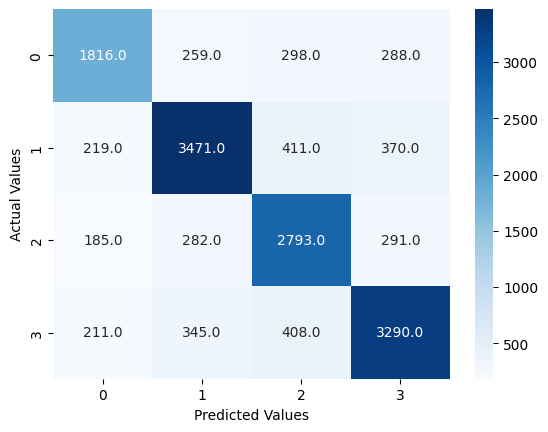

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()



In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      2661
           1       0.80      0.78      0.79      4471
           2       0.71      0.79      0.75      3551
           3       0.78      0.77      0.77      4254

    accuracy                           0.76     14937
   macro avg       0.76      0.75      0.76     14937
weighted avg       0.76      0.76      0.76     14937



In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rf.score(X_train, y_train)

0.9741061863952866

In [66]:
y_pred = rf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.912432215304278

<Axes: >

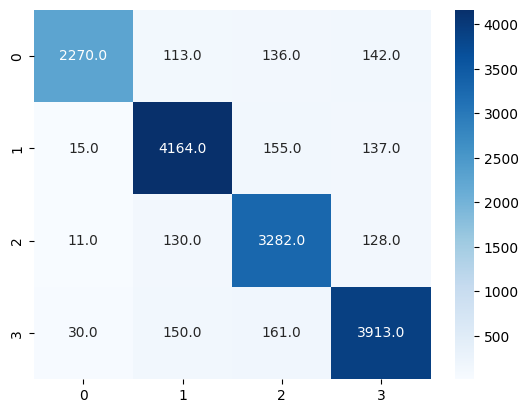

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2661
           1       0.91      0.93      0.92      4471
           2       0.88      0.92      0.90      3551
           3       0.91      0.92      0.91      4254

    accuracy                           0.91     14937
   macro avg       0.92      0.91      0.91     14937
weighted avg       0.91      0.91      0.91     14937



In [74]:
import pickle

In [80]:
file_name='/archive (7).zip'
pickle.dump(rf,open(file_name,'wb'))

In [81]:
loaded_model=pickle.load(open(file_name,'rb'))


In [90]:
X_new=X_test[1]
print(y_test.iloc[1])
prediction=loaded_model.predict(X_new)
print(prediction)
if(prediction[0]==2):
    print('negative')
elif(prediction[0]==1):
    print('neutral')
elif(prediction[0]==3):
    print('positive')
elif(prediction[0]==0):
    print('very negative')
else:
    print('very positive')

3
[3]
positive


In [91]:
X_new=X_test[3]
print(y_test.iloc[3])
prediction=loaded_model.predict(X_new)
print(prediction)
if(prediction[0]==2):
    print('negative')
elif(prediction[0]==1):
    print('neutral')
elif(prediction[0]==3):
    print('positive')
elif(prediction[0]==0):
    print('very negative')
else:
    print('very positive')


0
[0]
very negative
